In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#since the csv file does not have column names so, keep header=None otherwise it will take first row as columns.
df=pd.read_csv("C:\\Users\\ACER\\Downloads\\474_966_bundle_archive\\haberman.csv",header=None)
#specify the column names
df.columns=["age","operation_year","auxillary_positive_nodes","survival_status"]
df

,age,operation_year,auxillary_positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [3]:
print(df.shape)

(306, 4)


Total number of rows are 306 and total no. of columns are 4

In [4]:
#check the dataset is balanced or unbalanced?
df["survival_status"]=df["survival_status"].replace([1,2],["more_than_5","less_than_5"])
df["survival_status"].value_counts()

more_than_5    225
less_than_5     81
Name: survival_status, dtype: int64

Obsevations:
    1. 225 peoples out of 306 from the database are survived for more than 5 years after the operation.
    2. 81 peoples out of 306 from the database are survived for less than 5 years after the operation.
    3. since the 225 is approximately 3 times the 81 so the dataset is unbalanced.

In [39]:
df.describe()

,age,operation_year,auxillary_positive_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


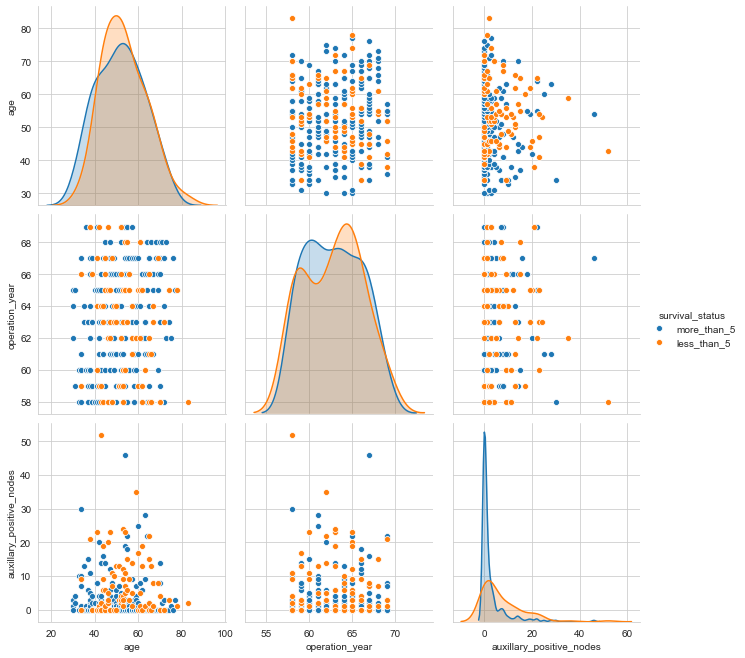

In [40]:
"""Here No.of attributes are 3 which can decide the survival_status of the patient.So,to analyse the we can plot the 3D
plot but 3D plot are somewhat difficult for analysis as it requires more mouse movement.so to analyse the data we are creating a
pair plot which are 2D""" 
sns.set_style("whitegrid")
sns.pairplot(df,hue="survival_status",height=3)
plt.show()

Observations:
    1. age and auxillary_positive_nodes graph can somewhat distinguish the survival_status as compare to other plots.

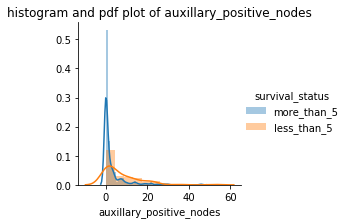

In [13]:
#lets plot histogram and pdf for each attribute

sns.FacetGrid(df,hue="survival_status",height=3).map(sns.distplot,"auxillary_positive_nodes").add_legend()
plt.title("histogram and pdf plot of auxillary_positive_nodes")
plt.show()

Observations:
    1.if the auxillary_positive_nodes are less than 3 then there is more probability that the patient will survive more
      than 5 years.

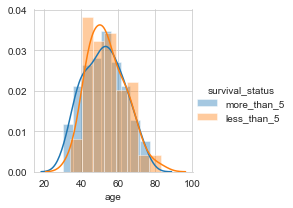

In [42]:
sns.FacetGrid(df,hue="survival_status",height=3).map(sns.distplot,"age").add_legend()
plt.title("histogram and pdf plot of the age")
plt.show()

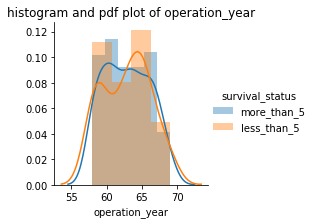

In [14]:
sns.FacetGrid(df,hue="survival_status",height=3).map(sns.distplot,"operation_year").add_legend()
plt.title("histogram and pdf plot of operation_year")
plt.show()

age and operation_year plots are overlapping for survival_status so can't conclude anything.

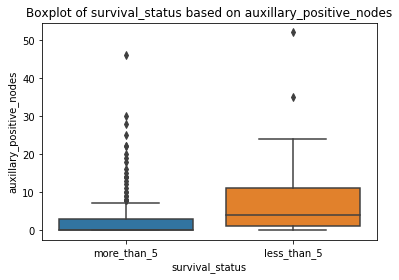

In [22]:
sns.boxplot(x="survival_status",y="auxillary_positive_nodes",data=df)
plt.title("Boxplot of survival_status based on auxillary_positive_nodes")
plt.show()

Observations:
    1.approx 75% patients who survived more than 5 years after operation were having auxillary_positive _nodes <=3.
    2.approx 50% patients who survived less_than_5 years after operation were having auxillary_positive_nodes >3.

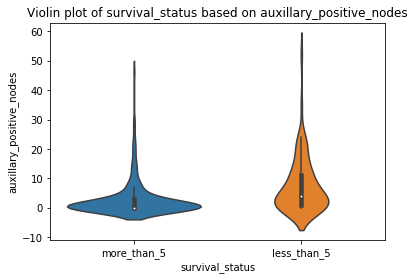

In [23]:
sns.violinplot(x="survival_status",y="auxillary_positive_nodes",height=3,data=df)
plt.title("Violin plot of survival_status based on auxillary_positive_nodes")
plt.show()

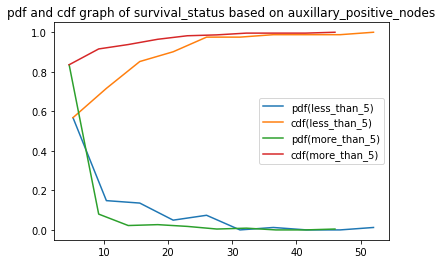

In [24]:
counts,bin_edges=np.histogram(df[df["survival_status"]=="more_than_5"]["auxillary_positive_nodes"],density=True)
pdf=counts/sum(counts)
cdf = np.cumsum(pdf)

counts1,bin_edges1=np.histogram(df[df["survival_status"]=="less_than_5"]["auxillary_positive_nodes"],density=True)
pdf1=counts1/sum(counts1)
cdf1 = np.cumsum(pdf1)

plt.plot(bin_edges1[1:],pdf1,label="pdf(less_than_5)")
plt.plot(bin_edges1[1:],cdf1,label="cdf(less_than_5)")

plt.plot(bin_edges[1:],pdf,label="pdf(more_than_5)")
plt.plot(bin_edges[1:],cdf,label="cdf(more_than_5)")

plt.title("pdf and cdf graph of survival_status based on auxillary_positive_nodes")
plt.legend()
plt.show()

More than 80% patients which survived for more than 5 years were having auxillary_positive_nodes<=3.
    

<Figure size 432x288 with 0 Axes>

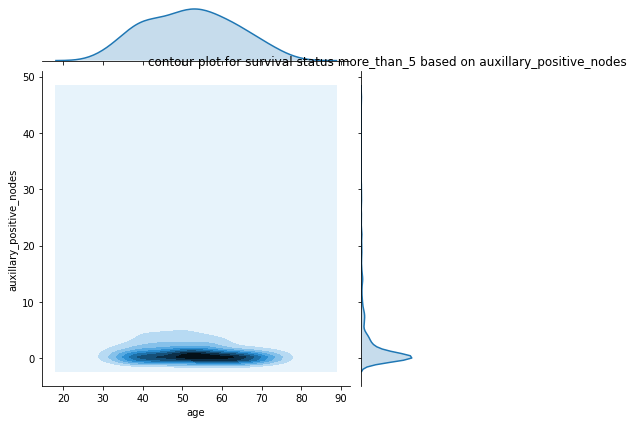

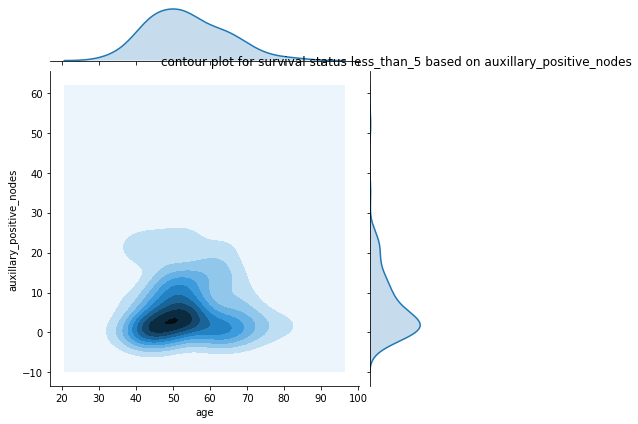

In [25]:
more_than_5_years=df[df["survival_status"]=="more_than_5"]
less_than_5_years=df[df["survival_status"]=="less_than_5"]
plt.figure(1)
sns.jointplot(x="age",y="auxillary_positive_nodes",data=more_than_5_years,kind="kde")
plt.title("contour plot for survival status more_than_5 based on auxillary_positive_nodes")
plt.figure(2)
sns.jointplot(x="age",y="auxillary_positive_nodes",data=less_than_5_years,kind="kde")
plt.title("contour plot for survival status less_than_5 based on auxillary_positive_nodes")
plt.show()

Observation:
    1.contour plot has very less spread for those who survived for more than 5 years. means those who had 1 or 2 auxillary 
      positive node are survived for more than 5 years after the operation.
    2.contour plot for less than 5 years survival status has big spread as compare to the its counterpart.means patient who
     had more than 1 or 2 auxillary_positive_plot are less likely to survive for more than 5 years.
    
      